In [83]:
import pandas as pd
import re
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 

In [97]:
cpi = pd.read_csv('./datasets/居民消费价格指数-月度.csv',header=2,encoding='gb2312',index_col=0)[:9]
cpi_old = pd.read_csv('./datasets/居民消费价格指数-月度-2016之前.csv',header=2,encoding='gb2312',index_col=0)[:9]

cpi = cpi.T.dropna(how='all')
cpi_old = cpi_old.T.dropna(how='all')
cpi = pd.concat([cpi,cpi_old])
cpi = cpi - 100
cpi = cpi.reset_index()
cpi.rename({'index':"日期"},inplace=True,axis=1)
cpi['日期'] = pd.to_datetime(cpi['日期'],format="%Y年%m月")

In [108]:
gdp = pd.read_csv('./datasets/gdp.csv',header=2,encoding='gb2312')[:32]

gdp = gdp.T

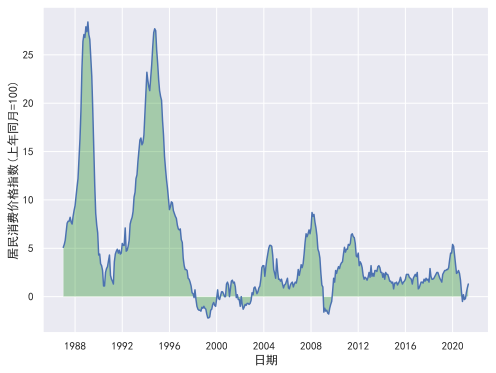

In [104]:
plt.figure(figsize=(8,6))
sns.lineplot(data=cpi,x='日期',y='居民消费价格指数(上年同月=100)')
plt.fill_between(cpi['日期'], 0, cpi['居民消费价格指数(上年同月=100)'], facecolor='green', alpha=0.3)
plt.show()